#### architecture

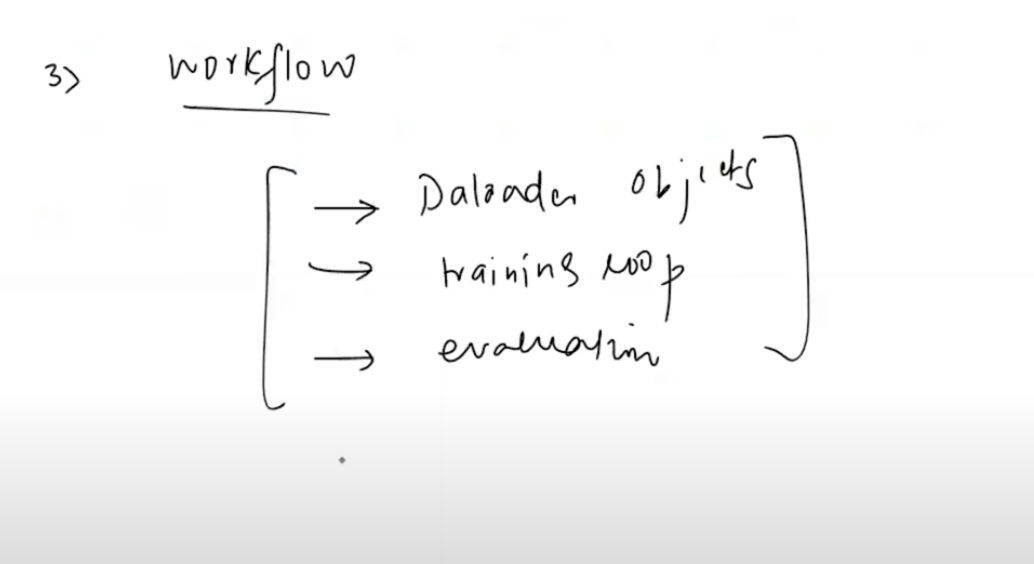

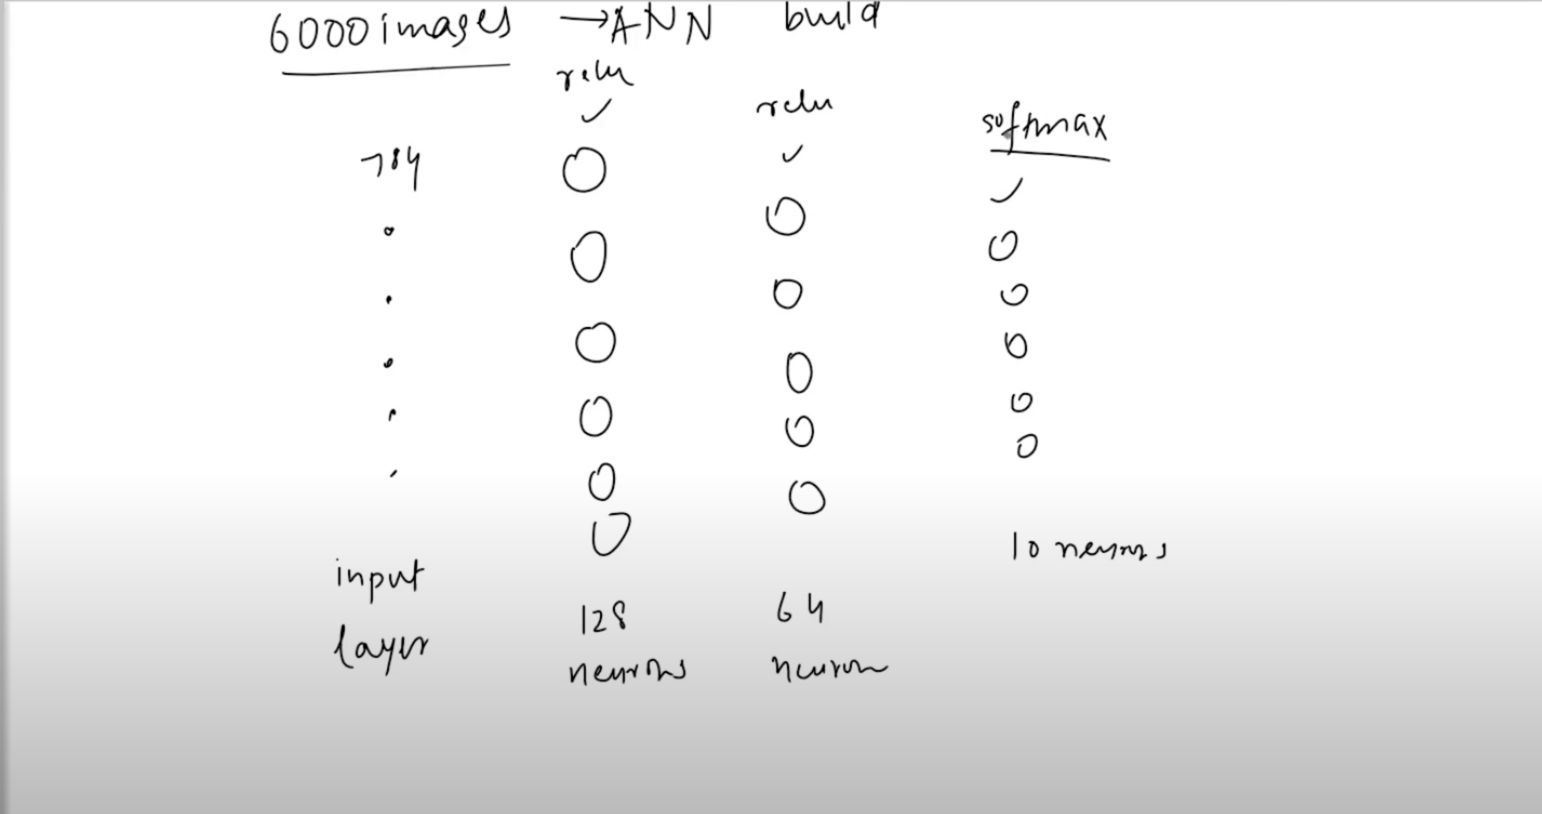

#### Data loading

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [5]:
# check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device : {device}")

Using device : cuda


In [6]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

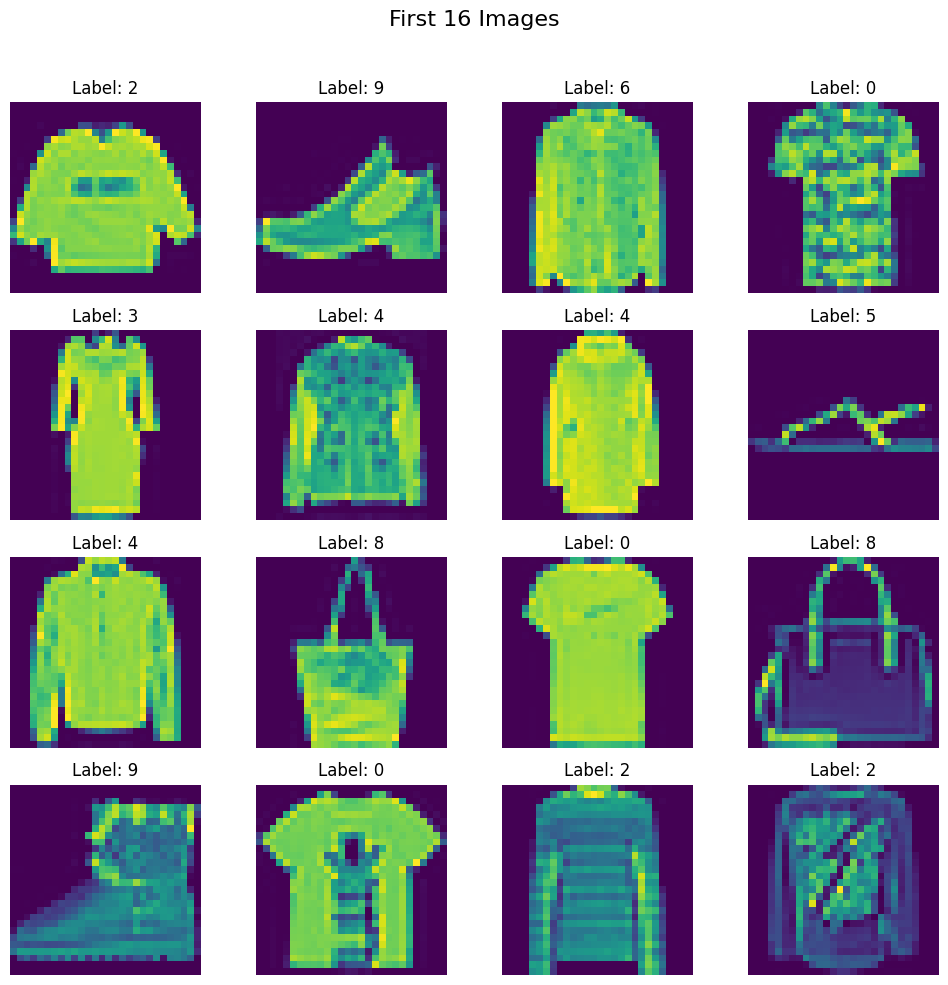

In [8]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [9]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# scaling the feautures
# most of the pixel value is 0 and some are random between 0 to 255
# so for better nn training we divide all the pixel value by the maxm pixel value
# so that every pixel value will be in the range [0 , 1]
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [13]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.82745098, 0.4       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
# create the coustomDataset class
from torch.utils.data import Dataset, DataLoader
import torch
class CoustomDataset(Dataset):

  def __init__ (self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels , dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [15]:
# create train dataset object
train_dataset = CoustomDataset(X_train, y_train)

In [16]:
len(train_dataset)

48000

In [17]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [18]:
# create the test dataset object
test_dataset = CoustomDataset(X_test, y_test)

In [19]:
len(test_dataset)

12000

In [20]:
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
# create a train loader and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

#### Training part

In [28]:
# creating NN class
from torch import nn

class MyNN(nn.Module) :

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # no need to explicitly add softmax cause pytorch implements it during cross entrophy loss
    )


  def forward(self , features):
    return self.model(features)




In [29]:
# set learning rate and epochs

learning_rate = 0.1
epochs = 100

In [30]:
# intanstiate the model

model = MyNN(X_train.shape[1])

model = model.to(device) # transferring the model to GPU

# loss function

lossFun = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [31]:
len(train_loader)

1500

In [32]:
#  training loop

for epoch in range(epochs):
  total_epoch_loss = 0;
  for batch_features, batch_labels in train_loader:
    # move data to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)

    # calculate loss
    loss = lossFun(y_pred, batch_labels)
    total_epoch_loss += loss.item()

    # zero the gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  avg_loss_in_each_epoch = total_epoch_loss/len(train_loader)
  print(f"epoch : {epoch} , loss : {avg_loss_in_each_epoch}")

epoch : 0 , loss : 0.6362952404220898
epoch : 1 , loss : 0.43220432658990227
epoch : 2 , loss : 0.3865210910042127
epoch : 3 , loss : 0.3586727901200453
epoch : 4 , loss : 0.3371369634444515
epoch : 5 , loss : 0.32164151947697006
epoch : 6 , loss : 0.3064739445174734
epoch : 7 , loss : 0.2934963101396958
epoch : 8 , loss : 0.28541686936219535
epoch : 9 , loss : 0.275992593764017
epoch : 10 , loss : 0.26720234387616315
epoch : 11 , loss : 0.25790529790769023
epoch : 12 , loss : 0.2517271324420969
epoch : 13 , loss : 0.24441840805734197
epoch : 14 , loss : 0.2365246276355659
epoch : 15 , loss : 0.23230663972472151
epoch : 16 , loss : 0.22490455588325858
epoch : 17 , loss : 0.22216040683475632
epoch : 18 , loss : 0.21617612898598115
epoch : 19 , loss : 0.21245163326213756
epoch : 20 , loss : 0.20647229102253914
epoch : 21 , loss : 0.20455098012213907
epoch : 22 , loss : 0.19717676381021737
epoch : 23 , loss : 0.19235521270086367
epoch : 24 , loss : 0.18703979803808032
epoch : 25 , loss : 

In [33]:
# set model to eval model
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [34]:
# evaluation code

total = 0
correct = 0;

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    # move data to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features) # forward pass :- this will give a probability matrix with 10 column
                  # and the column having the maximum probability will be it's label

    _ , predicted_label = torch.max(outputs , 1)

    total += batch_labels.shape[0]


    correct += (predicted_label == batch_labels).sum().item()


print(f"Accuracy = {correct / total}")


Accuracy = 0.8906666666666667
